In [3]:
import pandas as pd
import numpy as np
import joblib  # Para guardar nuestro modelo
import matplotlib.pyplot as plt
# Para dividir los datos
from sklearn.model_selection import train_test_split

# Para preprocesamiento
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# El modelo
from sklearn.linear_model import LogisticRegression

# Para evaluación
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('../data/raw/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Definimos las características (X) y la variable objetivo (y)
# Excluimos columnas que no usaremos en el modelo inicial
X = df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = df['Survived']

# Dividimos los datos (80% entrenamiento, 20% validación)
# Usamos 'random_state' para que la división sea siempre la misma (reproducibilidad)
# Usamos 'stratify=y' para asegurar que la proporción de supervivientes sea la misma en ambos sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de validación:", X_val.shape)

Tamaño del set de entrenamiento: (712, 7)
Tamaño del set de validación: (179, 7)


In [6]:
# 1. Definir qué columnas son numéricas y cuáles son categóricas
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# 2. Crear el pipeline para los datos numéricos
# - Imputar (rellenar nulos) con la mediana
# - Escalar los datos para que tengan una media de 0 y desviación estándar de 1
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 3. Crear el pipeline para los datos categóricos
# - Imputar (rellenar nulos) con el valor más frecuente
# - Convertir las categorías a números (One-Hot Encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 4. Combinar los pipelines numérico y categórico en un solo preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [7]:
# Crear el pipeline final que incluye el preprocesador y el modelo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Entrenar el pipeline completo con los datos de entrenamiento
print("Entrenando el modelo baseline...")
model_pipeline.fit(X_train, y_train)
print("¡Entrenamiento completado!")

Entrenando el modelo baseline...
¡Entrenamiento completado!


Precisión del modelo: 0.8045

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Matriz de Confusión:


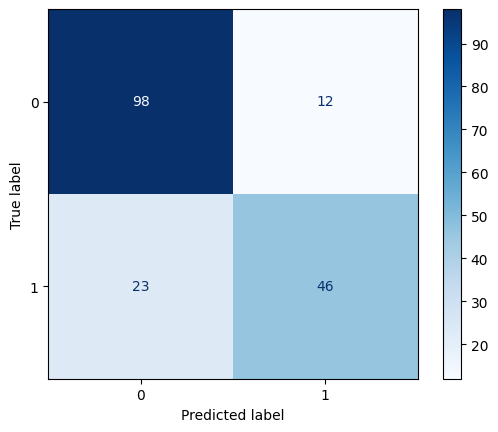

In [8]:
# Realizar predicciones en el conjunto de validación
y_pred = model_pipeline.predict(X_val)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_val, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")

# Mostrar un reporte de clasificación más detallado
print("\nReporte de Clasificación:")
print(classification_report(y_val, y_pred))

# Mostrar la matriz de confusión
print("\nMatriz de Confusión:")
ConfusionMatrixDisplay.from_estimator(model_pipeline, X_val, y_val, cmap='Blues')
plt.show()

In [9]:
# Definir la ruta de salida
artifact_path = '../artifacts/logistic_regression_pipeline.joblib'

# Guardar el pipeline
joblib.dump(model_pipeline, artifact_path)

print(f"Modelo guardado en: {artifact_path}")

Modelo guardado en: ../artifacts/logistic_regression_pipeline.joblib
